## 1. Settings

### 1) Import required libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Data

### 1) Download Data

In [2]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
#MNIST 데이터를 다운로드 받는다.

Processing...
Done!


### 2) Item

In [3]:
print(mnist_train) 

# dataset.__getitem__(idx) #mnist_train도 Dataset type이다. 따라서, len, getitem 메서드를 사용할 수 있다.
image,label = mnist_train.__getitem__(0)
print(image.size(),label)

# dataset[idx] #간단히 subscript할 수도 있다.
image,label = mnist_train[0] 
print(image.size(),label)

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./
    Transforms (if any): ToTensor()
    Target Transforms (if any): None
torch.Size([1, 28, 28]) tensor(5)
torch.Size([1, 28, 28]) tensor(5)


### 3) Length

In [4]:
# dataset.__len__() #mnist_train도 Dataset type이다. 따라서, len, getitem 메서드를 사용할 수 있다.
print(mnist_train.__len__()) 

# len(dataset) #간단히 len을 사용할 수도 있다.
len(mnist_train)

60000


60000

### 4) Show Image

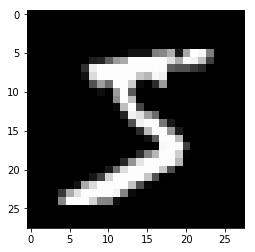

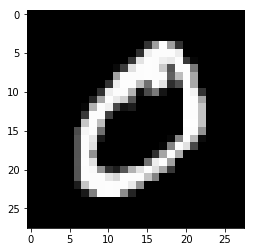

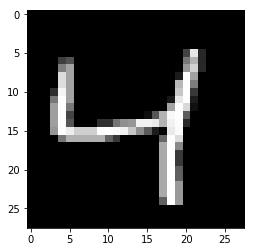

In [5]:
for i in range(3):
    img= mnist_train[i][0].numpy() #Tensor를 Numpy 배열로 변환
    plt.imshow(img[0],cmap='gray') #plt로 이미지를 보여준다.
    plt.show()

## 3. Convolution Layer

### 1) Channels

torch.Size([1, 3, 26, 26])


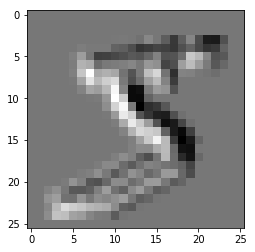

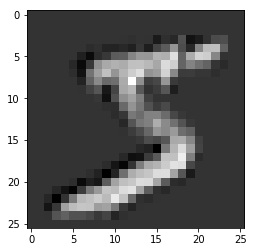

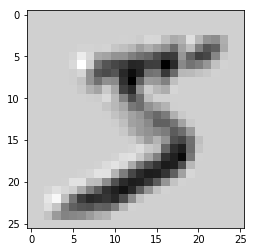

In [7]:
image,label = mnist_train[0]
image = image.view(-1,image.size()[0],image.size()[1],image.size()[2]) #Tensor의 size를 view로 변경해 준다.

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3) #간단한 Conv 모델에 집어 넣어 결과를 가져온다.
output = conv_layer(image)
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(),cmap='gray') #각 체널에 따른 이미지의 출력 결과를 확인한다.
    plt.show()

### 2) Kernel Size

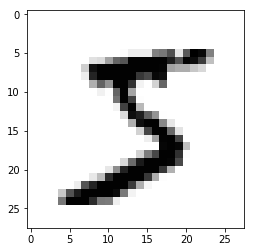

torch.Size([1, 3, 28, 28])


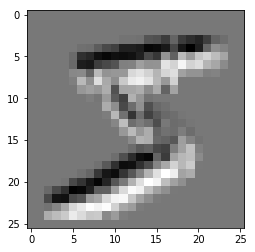

torch.Size([1, 3, 26, 26])


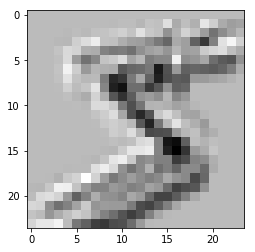

torch.Size([1, 3, 24, 24])


In [10]:
conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5)
output = conv_layer(image)
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

#커널 사이즈에 따른 이미지의 변화를 확인한다. 커널 사이즈가 커질 수록, output 되는 이미지의 크기는 줄어든다.

### 3) Stride

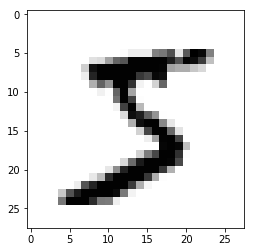

torch.Size([1, 3, 28, 28])


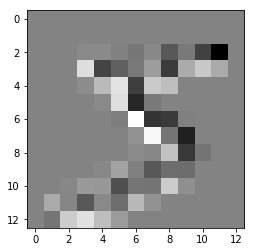

torch.Size([1, 3, 13, 13])


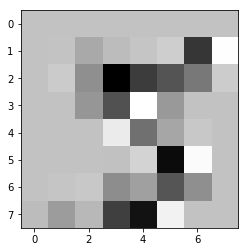

torch.Size([1, 3, 8, 8])


In [11]:
conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1,stride=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,stride=2)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5,stride=3)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

#Stride에 따른 이미지의 변화를 확인한다. Stride가 클수록 이미지는 줄어준다.

### 4) Padding

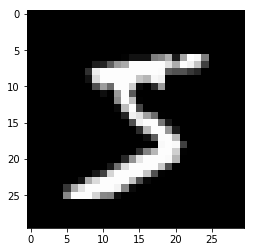

torch.Size([1, 3, 30, 30])


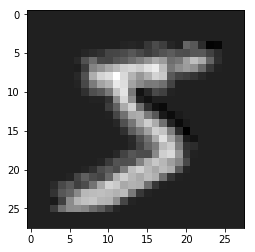

torch.Size([1, 3, 28, 28])


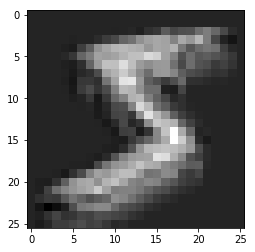

torch.Size([1, 3, 26, 26])


In [12]:
conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=1,padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=3,padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

conv_layer = nn.Conv2d(in_channels=1,out_channels=3,kernel_size=5,padding=1)
output = conv_layer(Variable(image))
plt.imshow(output[0,0,:,:].data.numpy(),cmap='gray')
plt.show()
print(output.size())

#Padding을 적절하게 넣어, 이미지의 output 결과를 어느정도 제어할 수 있다.